# Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df_orl = pd.read_csv("data/parameter_igt_orl.csv")
df_orl["subjID_label"] = df_orl["subjID"].astype("category").cat.codes # number label for old/young
df_orl.head()

,subjID,A+,A-,K,BetaF,BetaP,A+-A-,subjID_label
0,old,0.324444,0.068862,1.502130,2.523191,-5.547480,0.255581,0
1,old,0.885744,0.120145,0.012591,3.193244,-9.159800,0.765598,0
2,old,0.318205,0.078128,1.927309,0.615708,9.272336,0.240077,0
3,old,0.728192,0.106737,0.388407,2.595746,-2.239555,0.621455,0
4,old,0.356229,0.091987,1.810674,0.508605,9.825699,0.264241,0


## K-Means
### K Means Clustering for BetaF and BetaP vs Old and Young

In [3]:
df_orl_betas = df_orl[["subjID_label", "BetaF", "BetaP"]]
kmeans_betas = KMeans(n_clusters=3).fit(df_orl_betas)
centroids_betas = kmeans_betas.cluster_centers_

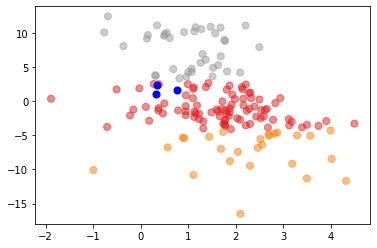

In [4]:
plt.scatter(df_orl_betas['BetaF'], df_orl_betas['BetaP'], c= kmeans_betas.labels_, cmap = "Set1", s=50, alpha=0.5)
plt.scatter(centroids_betas[:, 0], centroids_betas[:, 1], c='blue', s=50)
plt.show()

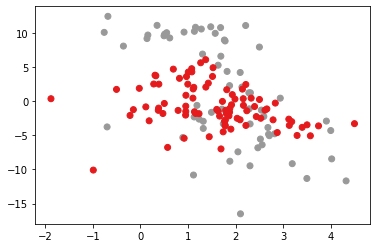

In [5]:
plt.scatter(df_orl_betas['BetaF'], df_orl_betas['BetaP'], c=df_orl_betas['subjID_label'], cmap="Set1_r")
plt.show()

## Hierarchical Agglomerative
### Cluster based on the A+ and A- columns only

Fit the clusters and show labels assigned to each data point

In [6]:
agg_cluster_A = AgglomerativeClustering().fit(df_orl[["A+", "A-"]])
agg_cluster_A.labels_

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

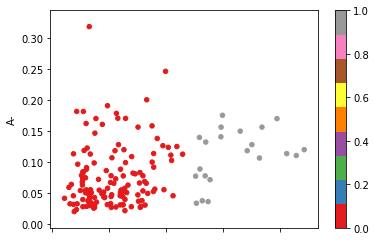

In [7]:
df_orl.plot.scatter("A+", "A-", c=agg_cluster_A.labels_, cmap="Set1")
plt.show()

Show how the entire dataset is clustered with the two parameters

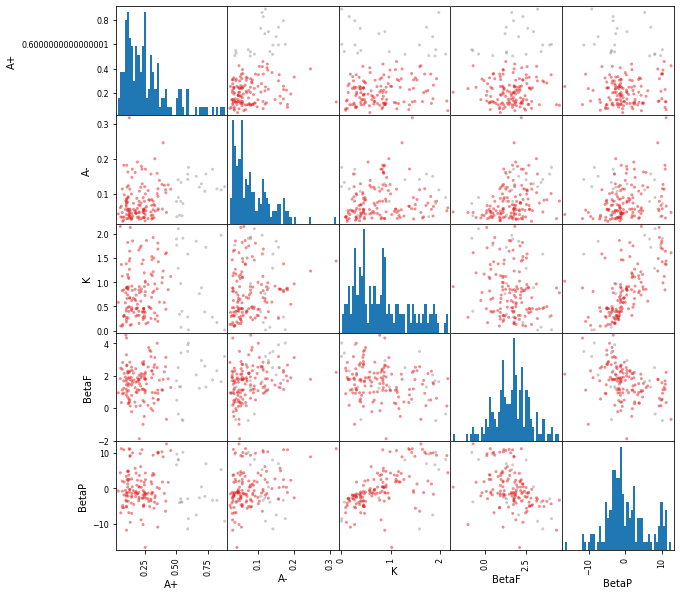

In [8]:
pd.plotting.scatter_matrix(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=50), c=agg_cluster_A.labels_, cmap="Set1")
plt.show()

### Cluster with all parameters

In [9]:
agg_cluster_all = AgglomerativeClustering().fit(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]])
agg_cluster_all.labels_

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Show how A+ and A- are clustered based on all params

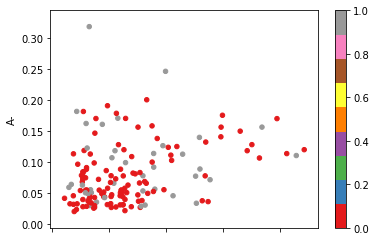

In [10]:
df_orl.plot.scatter("A+", "A-", c=agg_cluster_all.labels_, cmap="Set1")
plt.show()

Show how entire dataset is clustered based on all params

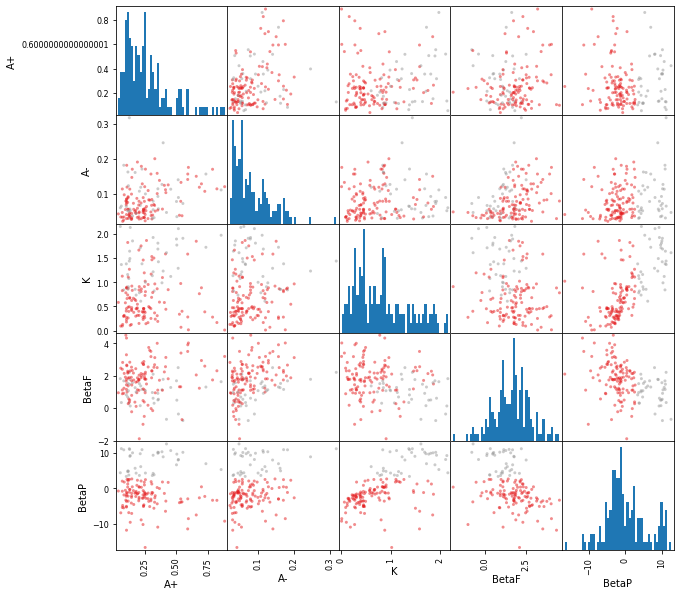

In [11]:
pd.plotting.scatter_matrix(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=50), c=agg_cluster_all.labels_, cmap="Set1")
plt.show()

### Clustering the old group

Clustering on the old group, there is a clear separation based on the BetaP parameter. The other parameters seem to be well mixed between the clusters, meaning there's no significant difference to cluster based on.

In [12]:
df_orl_old = df_orl[df_orl["subjID"] == "old"]
agg_cluster_old = AgglomerativeClustering().fit(df_orl_old[["A+", "A-", "K", "BetaF", "BetaP"]])
agg_cluster_old.labels_

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

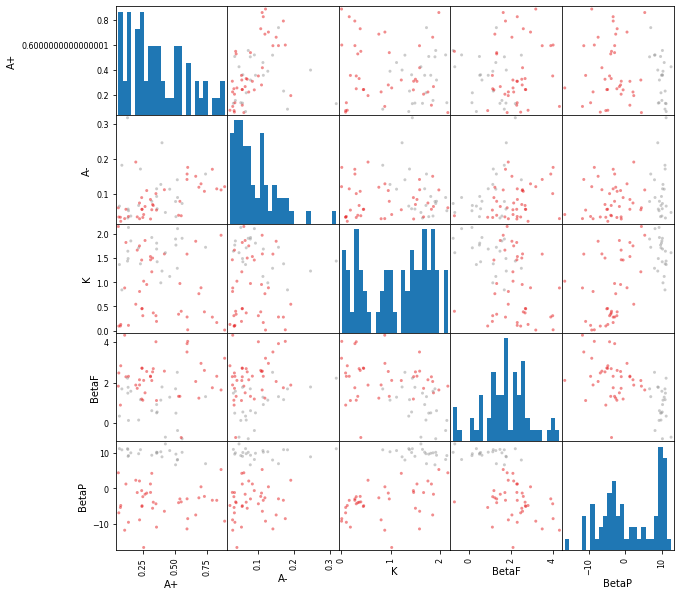

In [13]:
pd.plotting.scatter_matrix(df_orl_old[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=25), c=agg_cluster_old.labels_, cmap="Set1")
plt.show()

### Using more than two clusters

In [14]:
agg_cluster3 = AgglomerativeClustering(n_clusters=3).fit(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]])
agg_cluster3.labels_

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1])

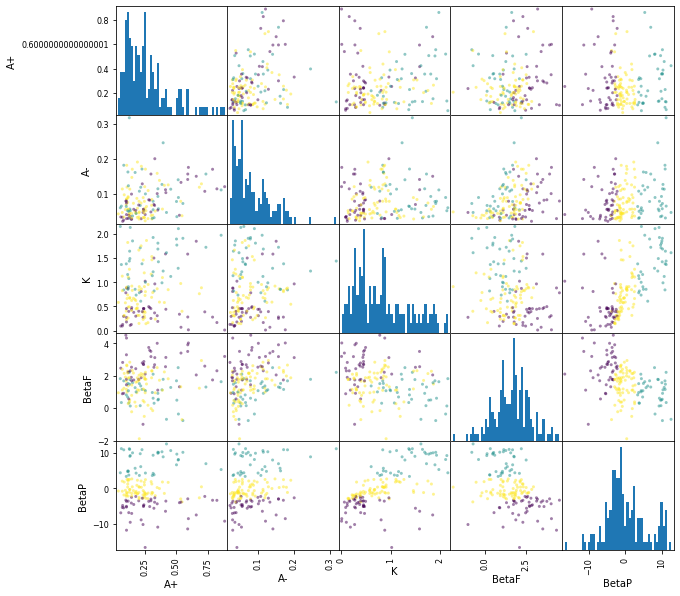

In [15]:
pd.plotting.scatter_matrix(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=50), c=agg_cluster3.labels_, cmap="viridis")
plt.show()

There seems to be much better clusters for the BetaF & BetaP parameters.

## Evaluating the clusters
### Elbow method

The elbow method shows that for these parameters the optimal number of clusters is 2/3

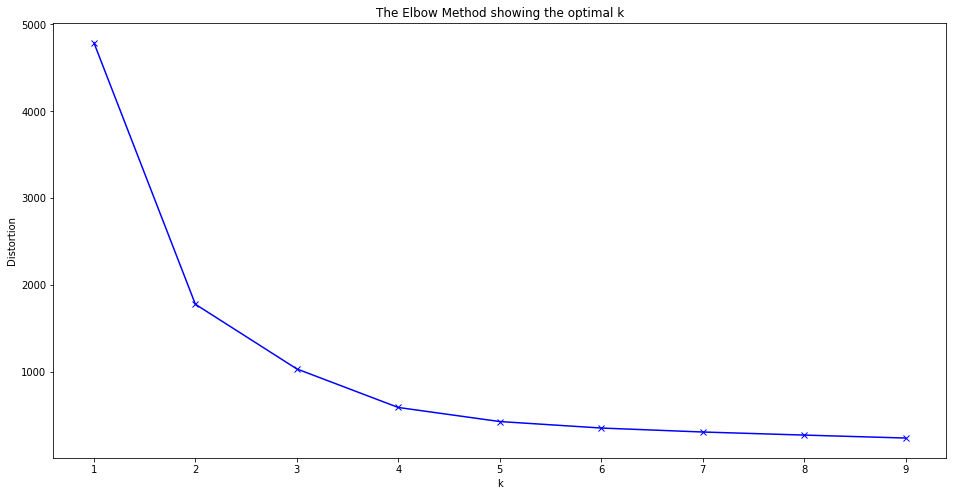

In [16]:
df1 = df_orl[["A+", "A-", "K", "BetaF", "BetaP"]]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette Analysis
TODO